# **Problema 2b - Aprendizaje Automático II**
# *Integrantes*:
* ### Demarré, Lucas
* ### Donnarumma, César
* ### Longo, Bruno

---

# **Tabla de contenidos**

1.   [**Librerías**](#)
2.   [**Establecemos la GPU por defecto en caso de estar disponible**](#)
3.   [**Carga del Dataset, preprocesamiento y análisis**](#)
        1.   [*Carga del Dataset*](#)
        2.   [*Información del Dataset*](#)
        3.   [*Descartamos el label*](#)
        4.   [*Cantidad de noticias de entrenamiento*](#)
        5.   [*Vista previa de las noticias*](#)
        6.   [*Limpieza del Dataset*](#)
        7.   [*Vista previa de las noticias limpias*](#)
        8.   [*Información del Dataset*](#)
4.   [**Armado del Dataset para entrenar**](#)
        1.   [*Terminamos de acomodar el texto*](#)
        2.   [*Vista previa de los resultados**](#)
        3.   [*Prepararamos la vectorización y el vocabulario*](#)
        4.   [*Vocabulario obtenido*](#)
        5.   [*Ejemplo: vectorización*](#)
        6.   [*Función para desvectorizar el texto*](#)
        7.   [*Ejemplo: vectorización/desvectorización*](#)
        8.   [*Vectorizamos ahora todo el texto*](#)
        9.   [*Análisis de los resultados*](#)
                1.  [*Contamos las frecuencias*](#)
                2.  [*Tabla con palabras más frecuentes*](#)
                3.  [*Gráfico de 100 palabras más frecuentes*](#)
                4.  [*Longitudes en palabras de las noticias*](#)
                5.  [*Tabla con medidas resumen de las longitudes*](#)
                6.  [*Tabla con longitudes de noticias en palabras agrupadas por intervalos*](#)
                7.  [*Histograma de longitudes en palabras*](#)
        10.  [*Concatenación todo el corpus de texto*](#)
        11.  [*Guardar el tensor de arriba que contiene slices en un 'tf.dataset'*](#)
        12.  [*Creación de pares (input, target) para entrenamiento*](#)
        13.  [*Función para crear Dataset de acuerdo a 'tamaño_secuencia' y 'tamaño_batch'*](#)
5.   [**Modelo 1: Una sola capa GRU con 512 celdas**](#)
        1.   [*Dataset para entrenar este modelo*](#)
        2.   [*Información del Dataset final*](#)
        3.   [*División train/validación*](#)
        4.   [*Parámetros para generar el modelo*](#)
        5.   [*Clase del modelo*](#)
        6.   [*Creación del modelo*](#)
                1.  [**Verificamos shape de salida, de paso le damos informacion del input de entrada para poder tirar luego el summary**](#)
                2.  [**Summary del modelo**](#)
                3.  [**Función costo**](#)
                4.  [**Compilación del modelo**](#)
                5.  [**Checkpoints del modelo**](#)
        7.   [*Ejecución del entrenamiento*](#)
                1.  [**Métricas**](#)
        8.   [*Generación de texto*](#)
                1.  [**Clase para predecir**](#)
                2.  [**Cargamos el modelo en caso de ser necesario**](#)
                3.  [**Predecimos**](#)
6.   [**Modelo 2: Una sola capa GRU con 2048 celdas**](#)
        1.   [*Dataset para entrenar este modelo*](#)
        2.   [*Información del Dataset final*](#)
        3.   [*División train/validación*](#)
        4.   [*Parámetros para generar el modelo*](#)
        5.   [*Clase del modelo*](#)
        6.   [*Creación del modelo*](#)
                1.  [**Verificamos shape de salida, de paso le damos informacion del input de entrada para poder tirar luego el summary**](#)
                2.  [**Summary del modelo**](#)
                3.  [**Función costo**](#)
                4.  [**Compilación del modelo**](#)
                5.  [**Checkpoints del modelo**](#)
        7.   [*Ejecución del entrenamiento*](#)
                1.  [**Métricas**](#)
        8.   [*Generación de texto*](#)
                1.  [**Clase para predecir**](#)
                2.  [**Cargamos el modelo en caso de ser necesario**](#)
                3.  [**Predecimos**](#)
7.   [**Modelo 3: Dos capas GRU**](#)
        1.   [*Dataset para entrenar este modelo*](#)
        2.   [*Información del Dataset final*](#)
        3.   [*División train/validación*](#)
        4.   [*Parámetros para generar el modelo*](#)
        5.   [*Clase del modelo*](#)
        6.   [*Creación del modelo*](#)
                1.  [**Verificamos shape de salida, de paso le damos informacion del input de entrada para poder tirar luego el summary**](#)
                2.  [**Summary del modelo**](#)
                3.  [**Función costo**](#)
                4.  [**Compilación del modelo**](#)
                5.  [**Checkpoints del modelo**](#)
        7.   [*Ejecución del entrenamiento*](#)
                1.  [**Métricas**](#)
        8.   [*Generación de texto*](#)
                1.  [**Clase para predecir**](#)
                2.  [**Cargamos el modelo en caso de ser necesario**](#)
                3.  [**Predecimos**](#)
8.   [**Modelo 4: Una sola capa LSTM**](#)
        1.   [*Dataset para entrenar este modelo*](#)
        2.   [*Información del Dataset final*](#)
        3.   [*División train/validación*](#)
        4.   [*Parámetros para generar el modelo*](#)
        5.   [*Clase del modelo*](#)
        6.   [*Creación del modelo*](#)
                1.  [**Verificamos shape de salida, de paso le damos informacion del input de entrada para poder tirar luego el summary**](#)
                2.  [**Summary del modelo**](#)
                3.  [**Función costo**](#)
                4.  [**Compilación del modelo**](#)
                5.  [**Checkpoints del modelo**](#)
        7.   [*Ejecución del entrenamiento*](#)
                1.  [**Métricas**](#)
        8.   [*Generación de texto*](#)
                1.  [**Clase para predecir**](#)
                2.  [**Cargamos el modelo en caso de ser necesario**](#)
                3.  [**Predecimos**](#)
9.   [**Conclusiones**](#)

## 1. **Librerías**

In [ ]:
import re
import os
import time
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow_datasets as tfds

## 2. **Establecemos la GPU por defecto en caso de estar disponible**

In [ ]:
# Configuramos para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configuramos para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificamos la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e) # Manejamos los errores

1 Physical GPUs, 1 Logical GPUs


## 3. **Carga del Dataset y preprocesamiento y análisis**

### 3.1. *Carga del Dataset*

In [ ]:
# Unicamente cargaremos las 120mil instancias de entrenamiento como lo dice el enunciado
ds_news, ds_news_info = tfds.load('ag_news_subset', split='train', shuffle_files=True, as_supervised=True, with_info=True)

### 3.2. *Información del Dataset*

In [ ]:
ds_news_info

tfds.core.DatasetInfo(
    name='ag_news_subset',
    full_name='ag_news_subset/1.0.0',
    description="""
    AG is a collection of more than 1 million news articles.
    News articles have been gathered from more than 2000  news sources by ComeToMyHead in more than 1 year of activity.
    ComeToMyHead is an academic news search engine which has been running since July, 2004.
    The dataset is provided by the academic comunity for research purposes in data mining (clustering, classification, etc),
    information retrieval (ranking, search, etc), xml, data compression, data streaming,
    and any other non-commercial activity.
    For more information, please refer to the link http://www.di.unipi.it/~gulli/AG_corpus_of_news_articles.html .
    
    The AG's news topic classification dataset is constructed by Xiang Zhang (xiang.zhang@nyu.edu) from the dataset above.
    It is used as a text classification benchmark in the following paper:
    Xiang Zhang, Junbo Zhao, Yann LeCun. Char

### 3.3. *Descartamos el label*

In [ ]:
ds_news = ds_news.map(lambda articulo, label: articulo)

### 3.4. *Cantidad de noticias de entrenamiento*

In [ ]:
print(f'Cantidad de noticias de entrenamiento: {ds_news.cardinality().numpy()}')

Cantidad de noticias de entrenamiento: 120000


### 3.5. *Vista previa de las noticias*

In [ ]:
for fila in ds_news.take(20):
  print(f'{fila.numpy()}\n')

b'AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.'

b'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.'

b'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.'

b'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.'

b'London, England (Sports Network) - England midfielder Steven Gerrard injured his groin late in Thursday #39;s training session, but is hopeful he will be ready for Saturday #39;s World Cup qualifier against Austria.'

b'TOKYO - Sony Corp. is banking on the \\$3 billion deal to acquire Hollywoo

* El texto de las noticias no esta limpio. Contiene caracteres codificados o en HTML
* Es necesario hacer una limpieza

### 3.6. *Limpieza del Dataset*

In [ ]:
# Función para limpiar y decodificar texto
def clean_and_decode(text):
    # Decodificamos el texto de bytes a cadena
    text = text.numpy().decode('utf-8')

    # Reemplazamos los '#39;' con un apóstrofo
    text = re.sub(r'#39;', "'", text)
    # Eliminamos las barras invertidas

    text = re.sub(r'\\', ' ', text)

    # Eliminamos donde dice 'quot;'
    text = re.sub(r'quot;', '', text)

    # Eliminamos los ' ' antes de "'s"
    text = re.sub(r' (\'s)', r'\1', text)

    # Eliminamos los ' ' antes de "'t"
    text = re.sub(r' (\'t)', r'\1', text)

    # Eliminamos los ' ' antes de "'em"
    text = re.sub(r' (\'em)', r'\1', text)

    # Eliminamos los ' ' antes de "'"
    text = re.sub(r' (\')', r'\1', text)

    # Reemplazamos dos o más espacios consecutivos por uno
    text = re.sub(r' {2,}', ' ', text)

    # Decodificamos los caracteres HTML
    text = re.sub(r'&lt;', '<', text)
    text = re.sub(r'&gt;', '>', text)
    text = re.sub(r'&amp;', '&', text)
    text = re.sub(r'&quot;', '"', text)
    text = re.sub(r'&apos;', "'", text)

    # Eliminamos las etiquetas HTML
    text = re.sub(r'<.*?>', '', text)

    return text

# Función tf.py_function para aplicar la limpieza y decodificación
def tf_clean_and_decode(text):
    cleaned_text = tf.py_function(clean_and_decode, [text], tf.string)
    cleaned_text = tf.ensure_shape(cleaned_text, shape=[])
    return cleaned_text

# Aplicamos la función de limpieza y decodificación al dataset
ds_news = ds_news.map(tf_clean_and_decode)

### 3.7. *Vista previa de las noticias limpias*

In [ ]:
for fila in ds_news.take(20):
  print(f'{fila.numpy()}\n')

b"AMD's new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions."

b'Reuters - Major League Baseball Monday announced a decision on the appeal filed by Chicago Cubs pitcher Kerry Wood regarding a suspension stemming from an incident earlier this season.'

b"President Bush's revenue-neutral tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners' sights, news reports say."

b'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.'

b"London, England (Sports Network) - England midfielder Steven Gerrard injured his groin late in Thursday's training session, but is hopeful he will be ready for Saturday's World Cup qualifier against Austria."

b'TOKYO - Sony Corp. is banking on the $3 billion deal to acquire Hollywood studio Metro-Goldwyn-Mayer Inc...'


### 3.8. *Información del Dataset*

In [ ]:
ds_news.element_spec

TensorSpec(shape=(), dtype=tf.string, name=None)

* *shape=(), dtype=tf.string*: se trata únicamente de una secuencia de texto de longitud variable

## 4. **Armado del Dataset para entrenar**

* Idea: separar con espacios algunos signos de puntuación para luego dividir por espacios y tratar dichos signos como palabras (que queden en el vocabulario así el modelo puede usarlos)

### 4.1. *Terminamos de acomodar el texto*

In [ ]:
# Termina de acomodar el texto para armar el vocabulario
def acomodar_texto(text):
    # Decodificamos el texto de bytes a cadena
    text = text.numpy().decode('utf-8')

    # Agregamos los espacio luego de 've, 're, 's
    text = re.sub(r"(?<!\s)'(ve|re|s)\b", r" '\1", text)

    # Si luego de '.' la siguiente palabra comienza con mayúscula (punto seguido), agregamos un espacio antes y despues
    text = re.sub(r'([.])\s+(?=[A-Z])', r' \1 ', text)

    # Si luego de los signos indicados hay un espacio, agregamos otro antes
    text = re.sub(r'([,;?!:)])\s+', r' \1 ', text)

    # Si antes de los signos indicados hay un espacio, agregamos otro despues
    text = re.sub(r'(\s[¿!(])', r'\1 ', text)

    # Si termina en punto, agregamos un espacio antes
    text = re.sub(r'(\w)\.(?=\s*$)', r'\1 .', text)

    # Si comienza en parentesis, agregamos un espacio luego
    text = re.sub(r'^\(', '( ', text)

    # Separamos los 3 puntos de las palabras para que los detecte en el vocabulario también
    text = re.sub(r'(?<!\s)\.\.\.(?!\s)', r' ... ', text)
    text = re.sub(r'(?<!\s)\.\.\.\s', r' ... ', text)
    text = re.sub(r'\s\.\.\.(?!\s)', r' ... ', text)

    # Agregamos un token de salto de línea al final del texto
    text = text + ' [nueva_linea]'

    return text

# Función tf.py_function para aplicar la funcino de arriba
def tf_acomodar_texto(text):
    texto_acomodado = tf.py_function(acomodar_texto, [text], tf.string)
    texto_acomodado = tf.ensure_shape(texto_acomodado, shape=[])
    return texto_acomodado

# Aplicamos la función de limpieza y decodificación al Dataset
ds_news_prueba = ds_news.map(tf_acomodar_texto)

### 4.2. *Vista previa de los resultados*

In [ ]:
for fila in ds_news_prueba.take(20):
  print(f'{fila.numpy()}\n')

b"AMD 's new dual-core Opteron chip is designed mainly for corporate computing applications , including databases , Web services , and financial transactions . [nueva_linea]"

b'Reuters - Major League Baseball Monday announced a decision on the appeal filed by Chicago Cubs pitcher Kerry Wood regarding a suspension stemming from an incident earlier this season . [nueva_linea]'

b"President Bush 's revenue-neutral tax reform needs losers to balance its winners , and people claiming the federal deduction for state and local taxes may be in administration planners' sights , news reports say . [nueva_linea]"

b'Britain will run out of leading scientists unless science education is improved , says Professor Colin Pillinger . [nueva_linea]'

b"London , England ( Sports Network ) - England midfielder Steven Gerrard injured his groin late in Thursday 's training session , but is hopeful he will be ready for Saturday 's World Cup qualifier against Austria . [nueva_linea]"

b'TOKYO - Sony Corp. i

### 4.3. *Prepararamos la vectorización y el vocabulario*

**Consideraciones:**
* Pasaremos todo a minúscula para que las palabras que empiezan con mayúscula y con minúsculas sean las mismas dentro del diccionario
* Separamos por espacios en blanco

In [ ]:
# Tamaño que va a tener el vocabulario, 10000 es lo que se suele utilizar
tamaño_vocabulario = 10000

# Creamos la funcion que vectoriza el texto
vectorizacion = tf.keras.layers.TextVectorization(
    max_tokens=tamaño_vocabulario, # Tamaño del vocabulario
    standardize='lower', # Se pasa todo a minúscula
    split='whitespace' # Separación por espacio en blanco
)

# Adaptamos el texto para obtener el vocabulario
vectorizacion.adapt(ds_news_prueba)

### 4.4. *Vocabulario obtenido*

In [ ]:
# Obtenemos el vocabulario (que va a tener 10mil palabras
vocabulario = vectorizacion.get_vocabulary()

# Creamos un diccionario con palabra/índice
indices_vocabulario = dict(zip(vocabulario, range(len(vocabulario))))

# Resultados
print('Diccionario palabra/índice:\n', indices_vocabulario)

Diccionario palabra/índice:
 {'': 0, '[UNK]': 1, 'the': 2, ',': 3, '.': 4, '[nueva_linea]': 5, 'a': 6, 'to': 7, 'of': 8, 'in': 9, 'and': 10, 'on': 11, "'s": 12, '-': 13, 'for': 14, 'that': 15, '(': 16, 'with': 17, 'as': 18, ')': 19, 'its': 20, 'at': 21, 'said': 22, 'is': 23, 'it': 24, 'by': 25, 'has': 26, 'new': 27, 'an': 28, 'from': 29, 'his': 30, 'will': 31, 'was': 32, 'reuters': 33, 'after': 34, 'have': 35, 'be': 36, 'their': 37, 'are': 38, 'over': 39, 'us': 40, 'he': 41, 'ap': 42, 'but': 43, ':': 44, 'two': 45, 'first': 46, 'this': 47, '--': 48, 'more': 49, 'monday': 50, 'wednesday': 51, 'tuesday': 52, 'company': 53, 'thursday': 54, 'world': 55, 'friday': 56, 'up': 57, 'one': 58, 'they': 59, 'yesterday': 60, 'last': 61, 'york': 62, 'against': 63, 'about': 64, 'than': 65, 'who': 66, 'year': 67, 'not': 68, 'were': 69, 'into': 70, 'been': 71, 'president': 72, 'out': 73, 'had': 74, 'inc.': 75, 'when': 76, 'week': 77, 'million': 78, 'sunday': 79, '...': 80, 'oil': 81, 'united': 82, 'wou

### 4.5. *Ejemplo: vectorización*

In [ ]:
for texto in ds_news_prueba.take(1):
  print(f'Texto no vectorizado: {texto.numpy()}\n')
  print(f'Texto vectorizado: {vectorizacion(texto.numpy())}')

Texto no vectorizado: b"AMD 's new dual-core Opteron chip is designed mainly for corporate computing applications , including databases , Web services , and financial transactions . [nueva_linea]"

Texto vectorizado: [1571   12   27 4228 5880  671   23  745 4683   14  661 1734  938    3
  250 7990    3  231  224    3   10  318 6067    4    5]


### 4.6. *Función para desvectorizar el texto*

In [ ]:
vocabulario_tensor = tf.constant(vocabulario)

@tf.function
def des_vectorizacion(ids):
    texto_lista = tf.gather(vocabulario_tensor, ids)
    resultado = tf.strings.reduce_join(texto_lista, separator=' ')
    return resultado

### 4.7. *Ejemplo: vectorización/desvectorización*

In [ ]:
for texto in ds_news_prueba.take(1):
  print(f'Texto no vectorizado: {texto.numpy()}\n')
  print(f'Texto vectorizado: {vectorizacion(texto.numpy())}\n')
  print(f'Texto desvectorizado: {des_vectorizacion(vectorizacion(texto.numpy()))}')

Texto no vectorizado: b"AMD 's new dual-core Opteron chip is designed mainly for corporate computing applications , including databases , Web services , and financial transactions . [nueva_linea]"

Texto vectorizado: [1571   12   27 4228 5880  671   23  745 4683   14  661 1734  938    3
  250 7990    3  231  224    3   10  318 6067    4    5]

Texto desvectorizado: b"amd 's new dual-core opteron chip is designed mainly for corporate computing applications , including databases , web services , and financial transactions . [nueva_linea]"


### 4.8. *Vectorizamos ahora todo el texto*

In [ ]:
def vect_analisis(texto):
  return vectorizacion(texto)

# Vectorizamos el texto para el análisis
ds_news_vectorizado = ds_news_prueba.map(vect_analisis)

### 4.9. *Análisis de los resultados*

#### 4.9.1. **Contamos las frecuencias**

In [ ]:
# Obtenemos todas las palabras vectorizadas
all_words = np.concatenate(list(ds_news_vectorizado.as_numpy_iterator()))

# Calculamos la frecuencia de cada palabra
word_counts = Counter(all_words)

# Convertimos los índices de vuelta a palabras
word_counts = {vocabulario[idx]: count for idx, count in word_counts.items()}

#### 4.9.2. **Tabla con palabras más frecuentes**

In [ ]:
tabla_frecuencia_palabras = pd.DataFrame(list(word_counts.items()), columns=['Palabra', 'Frecuencia'])
tabla_frecuencia_palabras = tabla_frecuencia_palabras.sort_values(by='Frecuencia', ascending=False)
tabla_frecuencia_palabras.head(10)

,Palabra,Frecuencia
53,[UNK],279408
33,the,198385
13,",",142929
21,.,135912
22,[nueva_linea],120000
30,a,103486
58,to,95836
80,of,89273
70,in,78328
18,and,66269


#### 4.9.3. **Gráfico de 100 palabras más frecuentes**

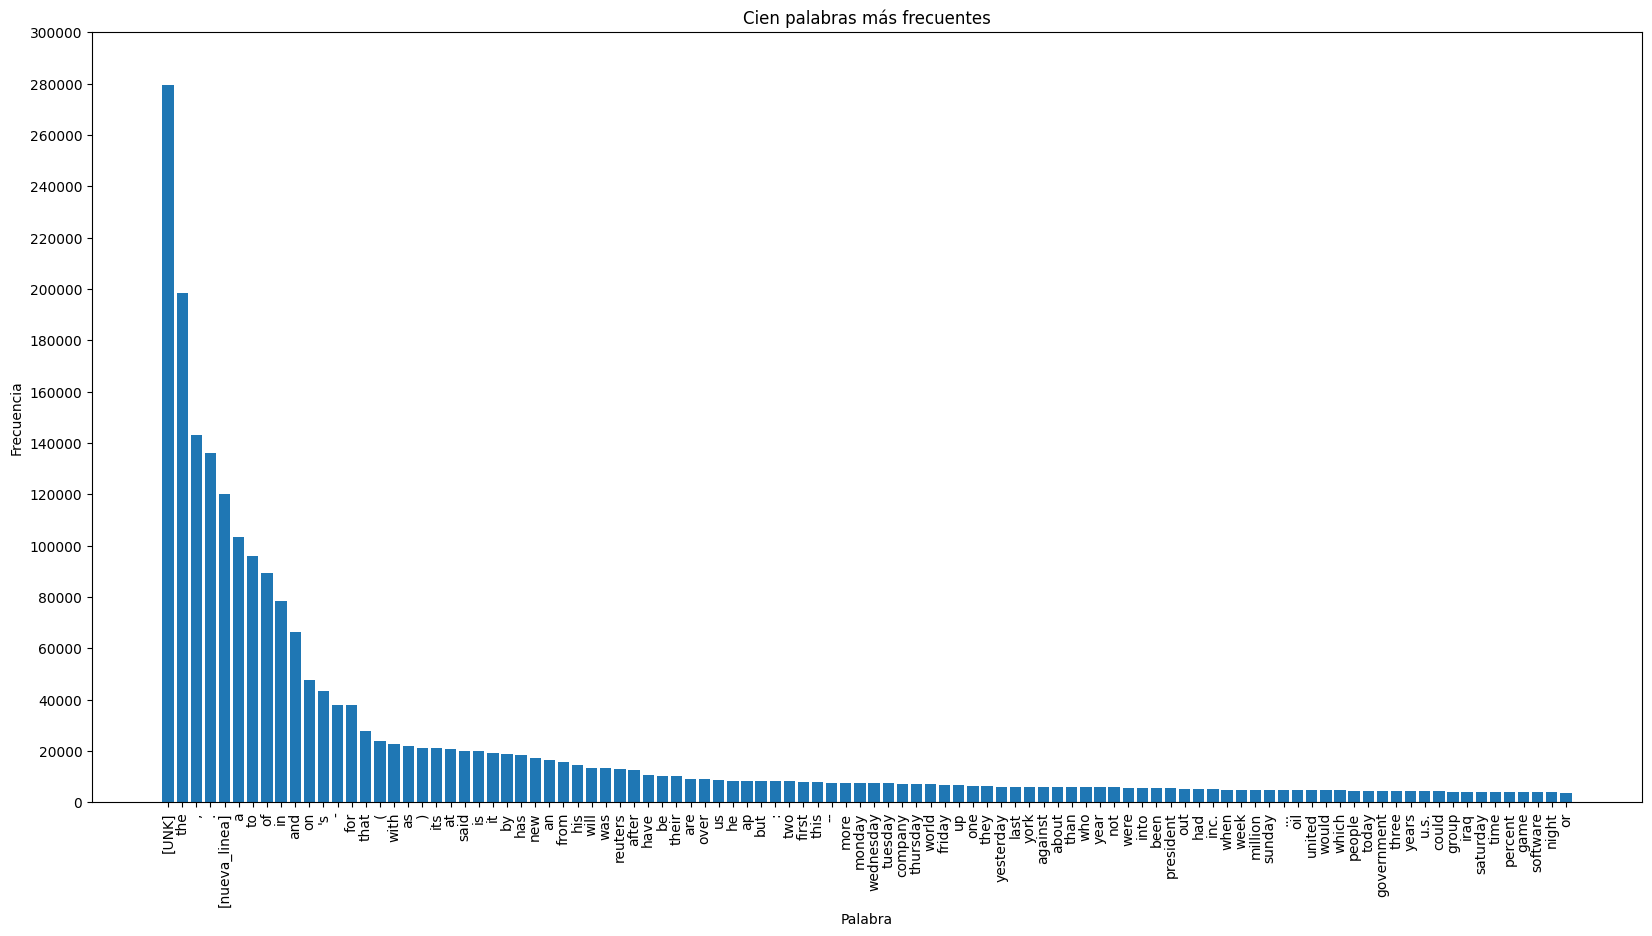

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(0,100), tabla_frecuencia_palabras['Frecuencia'][:100])
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.yticks(ticks=np.arange(0,300001,20000))
plt.xticks(ticks=np.arange(0,100), labels=tabla_frecuencia_palabras['Palabra'][:100], rotation=90)
plt.title('Cien palabras más frecuentes')
plt.show()

#### 4.9.4. **Longitudes en palabras de las noticias**

In [ ]:
# De cada noticia nos quedamos solo con la longitud en palabras
def longitud_palabras(texto):
    return tf.shape(texto)[0]

longitudes = ds_news_vectorizado.map(lambda x: tf.py_function(longitud_palabras, [x], tf.int32))

# Pasamos a lista para meterlo en una tabla
longitudes = list(longitudes.as_numpy_iterator())

#### 4.9.5. **Tabla con medidas resumen de las longitudes**

In [ ]:
# Metemos todo en un dataframe
longitudes_pal = pd.DataFrame(longitudes, columns=['Longitud'])
longitudes_pal.describe()

,Longitud
count,120000.000000
mean,35.004258
std,10.867052
min,3.000000
25%,28.000000
50%,34.000000
75%,40.000000
max,197.000000


#### 4.9.6. **Tabla con longitudes de noticias en palabras agrupadas por intervalos**

In [ ]:
# Hacemos intervalos para graficar luego
intervalos = np.arange(0, 201, 10)
longitudes_pal_intervalos = pd.cut(longitudes_pal['Longitud'], bins=intervalos)
longitudes_pal_intervalos = longitudes_pal_intervalos.value_counts().to_frame().reset_index().sort_values('Longitud')
longitudes_pal_intervalos

,Longitud,count
8,"(0, 10]",296
3,"(10, 20]",5749
1,"(20, 30]",34306
0,"(30, 40]",51646
2,"(40, 50]",22031
4,"(50, 60]",3047
5,"(60, 70]",1547
6,"(70, 80]",656
7,"(80, 90]",326
9,"(90, 100]",143


#### 4.9.7. **Histograma de longitudes en palabras**

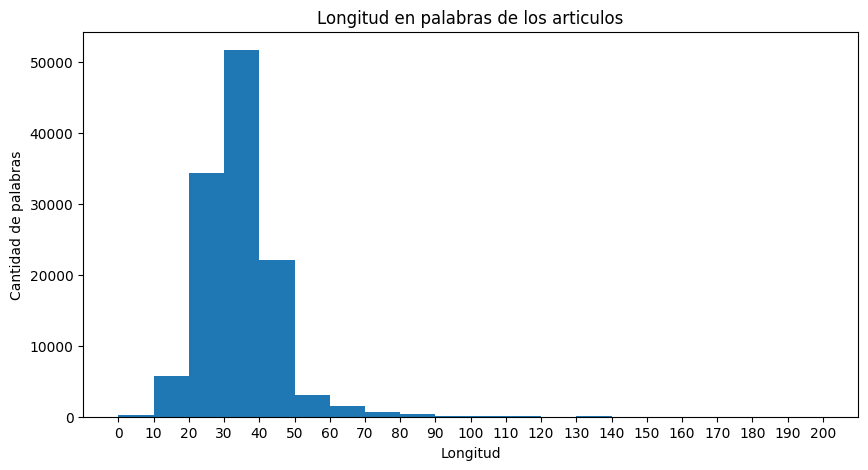

In [ ]:
# Graficamos histogramas
plt.figure(figsize=(10,5))
plt.bar(np.arange(0,20), longitudes_pal_intervalos['count'], align='edge', width=1)
plt.xlabel('Longitud')
plt.ylabel('Cantidad de palabras')
plt.xticks(ticks=np.arange(0,21), labels=np.arange(0,201,10))
plt.title('Longitud en palabras de los articulos')
plt.show()

### 4.10. *Concatenación todo el corpus de texto*

In [ ]:
# Convertir el dataset a una lista de tensores
ds_news_vectorizado_lista = list(ds_news_vectorizado.as_numpy_iterator())

# Concatenar todos los tensores en uno solo largo
ds_news_concatenado = tf.concat(ds_news_vectorizado_lista, axis=0)
ds_news_concatenado

<tf.Tensor: shape=(4200511,), dtype=int64, numpy=array([1571,   12,   27, ...,  774,  450,    5], dtype=int64)>

* Tenemos todas las palabras en un único vector *( shape=(4032655,) )*

### 4.11. *Guardar el tensor de arriba que contiene slices en un 'tf.dataset'*

In [ ]:
ds_corpus_id = tf.data.Dataset.from_tensor_slices(ds_news_concatenado)
ds_corpus_id.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=4200511>

* Ahora cada elemento del tensor que teniamos antes es un elemento del dataset *( cardinality=4032655 )*

### 4.12. *Creación de pares (input, target) para entrenamiento*

In [ ]:
def division_input_target(secuencia):
    input_text = secuencia[:-1]
    target_text = secuencia[1:]
    return input_text, target_text

### 4.13. *Función para crear Dataset de acuerdo a 'tamaño_secuencia' y 'tamaño_batch'*

In [ ]:
def crear_dataset(tamaño_secuencia, tamaño_batch):
  # Agrupamos los caracteres en lotes de a tamaño_secuencia+1
  secuencias = ds_corpus_id.batch(tamaño_secuencia+1, drop_remainder=True)

  # Sobre los lotes anteriores crear input/target
  dataset_input_target = secuencias.map(division_input_target)

  # Creamos el Dataset final
  tamaño_buffer = 10000

  dataset_input_target = (
      dataset_input_target

      # Mezclamos las instancias agarrando grupos de 'tamaño_buffer'
      .shuffle(tamaño_buffer)

      # Generamos los lotes de 'tamaño_batch' (descartando las que no lleguen a ese numero)
      .batch(tamaño_batch, drop_remainder=True)

      # Precargamos en memoria
      .prefetch(tf.data.experimental.AUTOTUNE))
  return dataset_input_target

## 5. **Modelo 1: Una sola capa GRU con 512 celdas**

### 5.1. *Dataset para entrenar este modelo*

In [ ]:
# Tamaño de la secuencia input/target
tamaño_secuencia = 30

# Tamaño de batch para descenso de gradiente
tamaño_batch = 64

# Creación del Dataset
dataset_input_target = crear_dataset(tamaño_secuencia, tamaño_batch)

### 5.2. *Información del Dataset final*

In [ ]:
print(dataset_input_target.cardinality())

for input, target in dataset_input_target.take(1):
  print(input.shape)
  print(target.shape)

print(f'{2032*64*30} palabras')

tf.Tensor(2117, shape=(), dtype=int64)
(64, 30)
(64, 30)
3901440 palabras


* Tenemos **2032 batches** de *64 instancias* cada uno por **30 palabras** cada una. Es decir del dataset original quedaron **3901440 palabras**

### 5.3. *División train/validación*

In [ ]:
batches_total = dataset_input_target.cardinality().numpy()
batches_train = round(batches_total * 0.8)
batches_valid = batches_total - batches_train

dataset_train = dataset_input_target.take(batches_train)
dataset_valid = dataset_input_target.take(batches_valid)

### 5.4. *Parámetros para generar el modelo*

In [ ]:
tamaño_vocabulario = len(vocabulario)
print(f'Tamaño vocabulario: {tamaño_vocabulario}')

dimension_embedding = 256
unidades_rnn = 512

Tamaño vocabulario: 10000


### 5.5. *Clase del modelo*

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

### 5.6. *Creación del modelo*

In [ ]:
model = MyModel(
    vocab_size=tamaño_vocabulario,
    embedding_dim=dimension_embedding,
    rnn_units=unidades_rnn)

#### 5.6.1. **Verificamos shape de salida, de paso le damos informacion del input de entrada para poder tirar luego el summary**

In [ ]:
for input_example_batch, target_example_batch in dataset_input_target.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 30, 10000) # (batch_size, sequence_length, vocab_size)


#### 5.6.2. **Summary del modelo**

In [ ]:
model.summary()

Model: "my_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     multiple                  2560000   
                                                                 
 gru_2 (GRU)                 multiple                  1182720   
                                                                 
 dense_2 (Dense)             multiple                  5130000   
                                                                 
Total params: 8,872,720
Trainable params: 8,872,720
Non-trainable params: 0
_________________________________________________________________


#### 5.6.3. **Función costo**

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

#### 5.6.4. **Compilación del modelo**

In [ ]:
model.compile(optimizer='adam', loss=loss)

#### 5.6.5. **Checkpoints del modelo**

In [ ]:
checkpoint_dir = './training_checkpoints1'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='min', verbose=1, min_delta=0.1)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', mode='min', verbose=1, patience=3, min_delta=0.1)

### 5.7. *Ejecución del entrenamiento*

In [ ]:
epocas = 50
start = time.time()
history = model.fit(dataset_train, epochs=epocas,
                    validation_data=dataset_valid,
                    callbacks=[checkpoint_callback, early_stopping, reduce_lr_on_plateau])
end = time.time()
total_time_test1 = round((end-start)/60, 2)

print(f'--------------------------------------')
print(f'Tiempo de ejecucion: {total_time_test1} minutos')
print(f'--------------------------------------')

Epoch 1/50
1694/1694 [==============================] - 35s 20ms/step - loss: 6.1744 - val_loss: 5.6335 - lr: 0.0010
Epoch 2/50
1694/1694 [==============================] - 36s 21ms/step - loss: 5.1039 - val_loss: 4.6538 - lr: 0.0010
Epoch 3/50
1694/1694 [==============================] - 34s 20ms/step - loss: 4.4411 - val_loss: 4.2321 - lr: 0.0010
Epoch 4/50
1694/1694 [==============================] - 33s 19ms/step - loss: 4.1337 - val_loss: 3.9932 - lr: 0.0010
Epoch 5/50
1694/1694 [==============================] - 33s 19ms/step - loss: 3.9315 - val_loss: 3.8162 - lr: 0.0010
Epoch 6/50
1694/1694 [==============================] - 33s 19ms/step - loss: 3.7761 - val_loss: 3.6787 - lr: 0.0010
Epoch 7/50
1694/1694 [==============================] - 33s 19ms/step - loss: 3.6488 - val_loss: 3.5614 - lr: 0.0010
Epoch 8/50
1694/1694 [==============================] - 33s 19ms/step - loss: 3.5396 - val_loss: 3.4663 - lr: 0.0010
Epoch 9/50
1694/1694 [==============================] - 33s 19ms

#### 5.7.1. *Métricas*

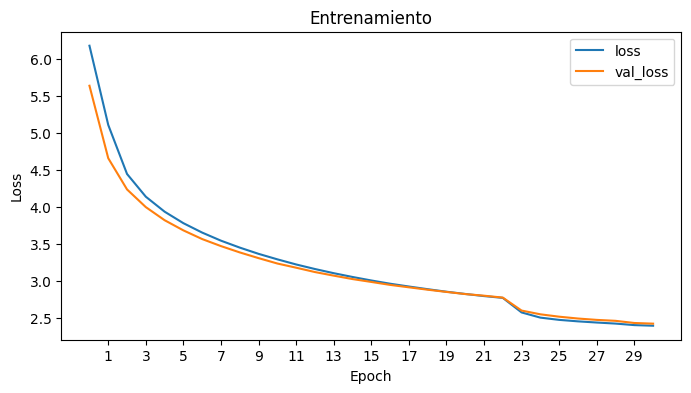

In [ ]:
metrics = history.history

plt.figure(figsize=(8,4))
plt.plot(history.epoch, metrics['loss'])
plt.plot(history.epoch, metrics['val_loss'])
plt.xticks(ticks=np.arange(1,history.epoch[-1],2))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.title('Entrenamiento')
plt.show()

* A las 25 épocas de entrenamiento la curva parece haberse estabilizado
* Hay muy poco overfitting

### 5.8. *Generación de texto*

#### 5.8.1. **Clase para predecir**

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    skip_ids = self.ids_from_chars('[UNK]')[:, None]
    sparse_mask = tf.SparseTensor(
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):


    input_ids = tf.squeeze(self.ids_from_chars(inputs), axis=-1)[None, :]

    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)

    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    predicted_logits = predicted_logits + self.prediction_mask


    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    predicted_chars = self.chars_from_ids(predicted_ids)
    return predicted_chars, states

#### 5.8.2. **Cargamos el modelo en caso de ser necesario**

Es necesario crear un modelo con la misma arquitecturas e hiperparametros que el original. El bloque de abajo es para utilizar el modelo en caso de tener los checkpoints con los pesos guardados.

In [ ]:
modelo = MyModel(
    vocab_size=tamaño_vocabulario,
    embedding_dim=dimension_embedding,
    rnn_units=unidades_rnn)

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
modelo.compile(optimizer='adam', loss=loss)

checkpoint_name = "mejor_modelo_1"

# Cargamos los pesos en el modelo
modelo.load_weights(checkpoint_name)

#### 5.8.3. **Predecimos**

In [ ]:
one_step_model = OneStep(model, des_vectorizacion, vectorizacion)

start = time.time()
states = None
next_word = 'amd'
result = [next_word]

for n in range(120):
  next_word, states = one_step_model.generate_one_step([next_word], states=states)
  result.append(next_word.numpy())

# Decodificamos a utf-8
result = [word.decode('utf-8') if isinstance(word, bytes) else word for word in result]

# Separamos en oraciones según '[nueva_linea]'
oraciones = []
oracion_actual = []

for palabra in result:
    if palabra == '[nueva_linea]':
        if oracion_actual:
            oraciones.append(' '.join(oracion_actual))
            oracion_actual = []
    else:
        oracion_actual.append(palabra)

# Mostramos las oraciones resultantes
print('---'*50+'\n')
c=1
for oracion in oraciones:
    print(f'Noticia {c}: {oracion}\n')
    c+=1
print('---'*50)
end = time.time()

print('\nRun time:', end - start, '\n')
print('---'*50)

------------------------------------------------------------------------------------------------------------------------------------------------------

Noticia 1: amd ran , are the key to the market with trademark over multimedia servers with them as wi-fi alliance and open its best x86 processor with the world 's most powerful platform .

Noticia 2: european antitrust regulators have filed a european lawsuit over wednesday 's enforcement proceedings against american businessman malcolm glazer , as a widely successful outcome that was in forming an advanced friendly . the european commission ruled friday .

------------------------------------------------------------------------------------------------------------------------------------------------------

Run time: 0.7960071563720703 

------------------------------------------------------------------------------------------------------------------------------------------------------


* Las oraciones no tienen una estructura correcta de oración
* No tiene un buen uso de las comas y los puntos
* Las oraciones parecen palabras sueltas y, por lógica, sin sentido o coherencia

## 6. **Modelo 2: Una sola capa GRU con 2048 celdas**

### 6.1. *Dataset para entrenar este modelo*

In [ ]:
# Tamaño de la secuencia input/target
tamaño_secuencia = 30

# Tamaño de batch para descenso de gradiente
tamaño_batch = 64

# Creación del Dataset
dataset_input_target = crear_dataset(tamaño_secuencia, tamaño_batch)

### 6.2. *Información del Dataset final*

In [ ]:
print(dataset_input_target.cardinality())

for input, target in dataset_input_target.take(1):
  print(input.shape)
  print(target.shape)

print(f'{2032*64*30} palabras')

tf.Tensor(2117, shape=(), dtype=int64)
(64, 30)
(64, 30)
3901440 palabras


* Tenemos **2032 batches** de *64 instancias* cada uno por **30 palabras** cada una. Es decir, del Dataset original quedaron **3901440 palabras**

### 6.3. *División train/validación*

In [ ]:
batches_total = dataset_input_target.cardinality().numpy()
batches_train = round(batches_total * 0.8)
batches_valid = batches_total - batches_train

dataset_train = dataset_input_target.take(batches_train)
dataset_valid = dataset_input_target.take(batches_valid)

### 6.4. *Parámetros para generar el modelo*

In [ ]:
tamaño_vocabulario = len(vocabulario)
print(f'Tamaño vocabulario: {tamaño_vocabulario}')

dimension_embedding = 256
unidades_rnn = 2048

Tamaño vocabulario: 10000


### 6.5. *Clase del modelo*

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

### 6.6. *Creación del modelo*

In [ ]:
model = MyModel(
    vocab_size=tamaño_vocabulario,
    embedding_dim=dimension_embedding,
    rnn_units=unidades_rnn)

#### 6.6.1. **Verificamos shape de salida, de paso le damos informacion del input de entrada para poder tirar luego el summary**

In [ ]:
for input_example_batch, target_example_batch in dataset_input_target.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 30, 10000) # (batch_size, sequence_length, vocab_size)


#### 6.6.2. **Summary del modelo**

In [ ]:
model.summary()

Model: "my_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     multiple                  2560000   
                                                                 
 gru_3 (GRU)                 multiple                  14168064  
                                                                 
 dense_3 (Dense)             multiple                  20490000  
                                                                 
Total params: 37,218,064
Trainable params: 37,218,064
Non-trainable params: 0
_________________________________________________________________


#### 6.6.3. **Función costo**

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

#### 6.6.4. **Compilación del modelo**

In [ ]:
model.compile(optimizer='adam', loss=loss)

#### 6.6.5. **Checkpoints del modelo**

In [ ]:
checkpoint_dir = './training_checkpoints2'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='min', verbose=1, min_delta=0.1)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', mode='min', verbose=1, patience=3, min_delta=0.1)

### 6.7. *Ejecución del entrenamiento*

In [ ]:
epocas = 50
start = time.time()
history = model.fit(dataset_train, epochs=epocas,
                    validation_data=dataset_valid,
                    callbacks=[checkpoint_callback, early_stopping, reduce_lr_on_plateau])
end = time.time()
total_time_test2 = round((end-start)/60, 2)

print(f'--------------------------------------')
print(f'Tiempo de ejecucion: {total_time_test2} minutos')
print(f'--------------------------------------')

Epoch 1/50
1694/1694 [==============================] - 110s 64ms/step - loss: 4.8746 - val_loss: 4.2122 - lr: 0.0010
Epoch 2/50
1694/1694 [==============================] - 107s 63ms/step - loss: 3.9508 - val_loss: 3.6510 - lr: 0.0010
Epoch 3/50
1694/1694 [==============================] - 110s 65ms/step - loss: 3.4558 - val_loss: 3.1956 - lr: 0.0010
Epoch 4/50
1694/1694 [==============================] - 111s 65ms/step - loss: 3.0061 - val_loss: 2.8228 - lr: 0.0010
Epoch 5/50
1694/1694 [==============================] - 109s 64ms/step - loss: 2.6278 - val_loss: 2.5306 - lr: 0.0010
Epoch 6/50
1694/1694 [==============================] - 112s 66ms/step - loss: 2.3448 - val_loss: 2.3131 - lr: 0.0010
Epoch 7/50
1694/1694 [==============================] - 109s 64ms/step - loss: 2.1402 - val_loss: 2.1474 - lr: 0.0010
Epoch 8/50
1694/1694 [==============================] - 109s 64ms/step - loss: 1.9980 - val_loss: 2.0400 - lr: 0.0010
Epoch 9/50
1694/1694 [==============================] - 

#### 6.7.1. **Métricas**

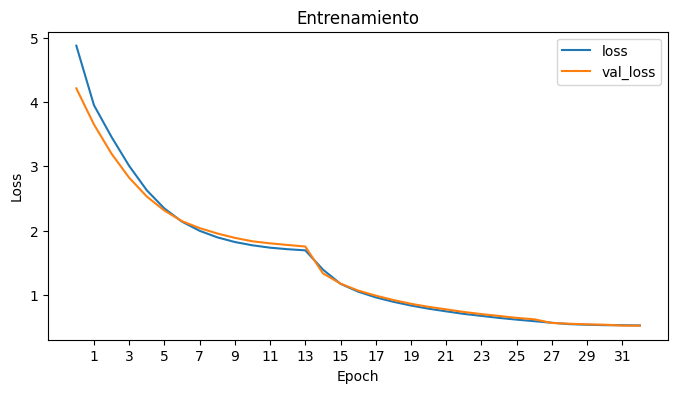

In [ ]:
metrics = history.history

plt.figure(figsize=(8,4))
plt.plot(history.epoch, metrics['loss'])
plt.plot(history.epoch, metrics['val_loss'])
plt.xticks(ticks=np.arange(1,history.epoch[-1],2))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.title('Entrenamiento')
plt.show()

* El modelo se estabilizó a partir de las 30 épocas
* No hay overfitting

### 6.8. *Generación de texto*

#### 6.8.1. **Clase para predecir**

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    skip_ids = self.ids_from_chars('[UNK]')[:, None]
    sparse_mask = tf.SparseTensor(
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    input_ids = tf.squeeze(self.ids_from_chars(inputs), axis=-1)[None, :]

    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)

    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    predicted_logits = predicted_logits + self.prediction_mask

    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    predicted_chars = self.chars_from_ids(predicted_ids)
    return predicted_chars, states

#### 6.8.2. **Cargamos el modelo en caso de ser necesario**

Es necesario crear un modelo con la misma arquitecturas e hiperparametros que el original. El bloque de abajo es para utilizar el modelo en caso de tener los checkpoints con los pesos guardados.

In [ ]:
modelo = MyModel(
    vocab_size=tamaño_vocabulario,
    embedding_dim=dimension_embedding,
    rnn_units=unidades_rnn)

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

modelo.compile(optimizer='adam', loss=loss)

checkpoint_name = "mejor_modelo_1"

# Cargar los pesos en el modelo
modelo.load_weights(checkpoint_name)

#### 6.8.3. **Predecimos**

In [ ]:
one_step_model = OneStep(model, des_vectorizacion, vectorizacion)

start = time.time()
states = None
next_word = 'amd'
result = [next_word]

for n in range(120):
  next_word, states = one_step_model.generate_one_step([next_word], states=states)
  result.append(next_word.numpy())

# Decodificamos a utf-8
result = [word.decode('utf-8') if isinstance(word, bytes) else word for word in result]

# Separamos en oraciones según '[nueva_linea]'
oraciones = []
oracion_actual = []

for palabra in result:
    if palabra == '[nueva_linea]':
        if oracion_actual:
            oraciones.append(' '.join(oracion_actual))
            oracion_actual = []
    else:
        oracion_actual.append(palabra)

# Mostramos las oraciones resultantes
print('---'*50+'\n')
c=1
for oracion in oraciones:
    print(f'Noticia {c}: {oracion}\n')
    c+=1
print('---'*50)
end = time.time()

print('\nRun time:', end - start, '\n')
print('---'*50)

------------------------------------------------------------------------------------------------------------------------------------------------------

Noticia 1: amd believes that a small and factor of care costs are set to take off the market , according to a study in the sept . the research firm has sparked speculation that claims the technology is the competition , says it will be good to matches the technology .

Noticia 2: when the new and happens to be unveiled , research has suggested . now that it is now pushing for the first three months of the holiday season , the new york times and u.s ...

------------------------------------------------------------------------------------------------------------------------------------------------------

Run time: 1.3858768939971924 

------------------------------------------------------------------------------------------------------------------------------------------------------


* Las oraciones empiezan a tener una estructura de oración
* Los usos de puntos y comás mejoraron pero siguen teniendo fallas
* Las oraciones parecen que se acercan a tener algo de sentido, pero siguen teniendo incoherencias

## 7. **Modelo 3: Dos capas GRU**

### 7.1. *Dataset para entrenar este modelo*

In [ ]:
# Tamaño de la secuencia input/target
tamaño_secuencia = 30

# Tamaño de batch para descenso de gradiente
tamaño_batch = 64

# Creación del Dataset
dataset_input_target = crear_dataset(tamaño_secuencia, tamaño_batch)

### 7.2. *Información del Dataset final*

In [ ]:
print(dataset_input_target.cardinality())

for input, target in dataset_input_target.take(1):
  print(input.shape)
  print(target.shape)

print(f'{2032*64*30} palabras')

tf.Tensor(2117, shape=(), dtype=int64)
(64, 30)
(64, 30)
3901440 palabras


* Tenemos **2032 batches** de *64 instancias* cada uno por **30 palabras** cada una. Es decir, del Dataset original quedaron **3901440 palabras**

### 7.3. *División train/validación*

In [ ]:
batches_total = dataset_input_target.cardinality().numpy()
batches_train = round(batches_total * 0.8)
batches_valid = batches_total - batches_train

dataset_train = dataset_input_target.take(batches_train)
dataset_valid = dataset_input_target.take(batches_valid)

### 7.4. *Parámetros para generar el modelo*

In [ ]:
tamaño_vocabulario = len(vocabulario)
print(f'Tamaño vocabulario: {tamaño_vocabulario}')

dimension_embedding = 256
rnn_1_units = 2048
rnn_2_units = 1024

Tamaño vocabulario: 10000


### 7.5. *Clase del modelo*

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru_1 = tf.keras.layers.GRU(rnn_units[0],
                                   return_sequences=True,
                                   return_state=True)
    self.gru_2 = tf.keras.layers.GRU(rnn_units[1],
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  # Training=False indica que call funciona en modo inferencia
  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      state_1 = self.gru_1.get_initial_state(x)
      states=[state_1]
    x, state_1 = self.gru_1(x, initial_state=states[0], training=training)
    if len(states) < 2:
      state_2 = self.gru_2.get_initial_state(x)
      states.append(state_2)
    x, state_2 = self.gru_2(x, initial_state=states[1], training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, [state_1, state_2]
    else:
      return x

### 7.6. *Creación del modelo*

In [ ]:
model = MyModel(
    vocab_size=tamaño_vocabulario,
    embedding_dim=dimension_embedding,
    rnn_units=[rnn_1_units, rnn_2_units])

#### 7.6.1. **Verificamos shape de salida, de paso le damos informacion del input de entrada para poder tirar luego el summary**

In [ ]:
for input_example_batch, target_example_batch in dataset_input_target.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 30, 10000) # (batch_size, sequence_length, vocab_size)


#### 7.6.2. **Summary del modelo**

In [ ]:
model.summary()

Model: "my_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     multiple                  2560000   
                                                                 
 gru_4 (GRU)                 multiple                  14168064  
                                                                 
 gru_5 (GRU)                 multiple                  9443328   
                                                                 
 dense_4 (Dense)             multiple                  10250000  
                                                                 
Total params: 36,421,392
Trainable params: 36,421,392
Non-trainable params: 0
_________________________________________________________________


#### 7.6.3. **Función costo**

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

#### 7.6.4. **Compilación del modelo**

In [ ]:
model.compile(optimizer='adam', loss=loss)

#### 7.6.5. **Checkpoints del modelo**

In [ ]:
checkpoint_dir = './training_checkpoints3.b'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='min', verbose=1, min_delta=0.1)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', mode='min', verbose=1, patience=3, min_delta=0.1)

### 7.7. *Ejecución del entrenamiento*

In [ ]:
epocas = 50
start = time.time()
history = model.fit(dataset_train, epochs=epocas,
                    validation_data=dataset_valid,
                    callbacks=[checkpoint_callback, early_stopping, reduce_lr_on_plateau])
end = time.time()
total_time_test3 = round((end-start)/60, 2)

print(f'--------------------------------------')
print(f'Tiempo de ejecucion: {total_time_test3} minutos')
print(f'--------------------------------------')

Epoch 1/50
1694/1694 [==============================] - 137s 80ms/step - loss: 6.2821 - val_loss: 5.6634 - lr: 0.0010
Epoch 2/50
1694/1694 [==============================] - 137s 81ms/step - loss: 5.3506 - val_loss: 5.0922 - lr: 0.0010
Epoch 3/50
1694/1694 [==============================] - 140s 82ms/step - loss: 4.9269 - val_loss: 4.7655 - lr: 0.0010
Epoch 4/50
1694/1694 [==============================] - 138s 81ms/step - loss: 4.6639 - val_loss: 4.5492 - lr: 0.0010
Epoch 5/50
1694/1694 [==============================] - 143s 84ms/step - loss: 4.4724 - val_loss: 4.3802 - lr: 0.0010
Epoch 6/50
1694/1694 [==============================] - 143s 84ms/step - loss: 4.3136 - val_loss: 4.2427 - lr: 0.0010
Epoch 7/50
1694/1694 [==============================] - 139s 82ms/step - loss: 4.1699 - val_loss: 4.1242 - lr: 0.0010
Epoch 8/50
1694/1694 [==============================] - 155s 91ms/step - loss: 4.0387 - val_loss: 4.0107 - lr: 0.0010
Epoch 9/50
1694/1694 [==============================] - 

#### 7.7.1. **Métricas**

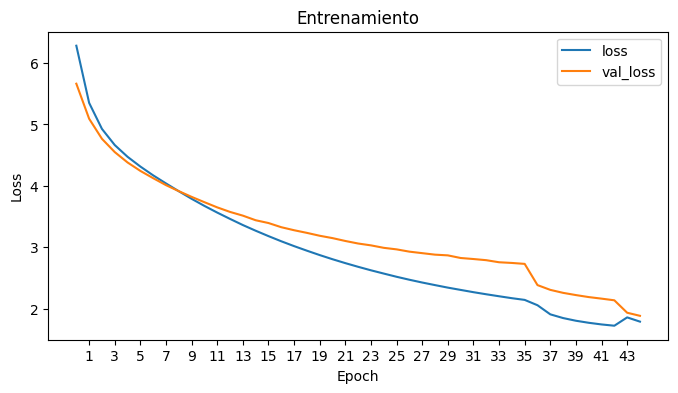

In [ ]:
metrics = history.history

plt.figure(figsize=(8,4))
plt.plot(history.epoch, metrics['loss'])
plt.plot(history.epoch, metrics['val_loss'])
plt.xticks(ticks=np.arange(1,history.epoch[-1],2))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.title('Entrenamiento')
plt.show()

* El modelo parece que empieza a estabilizarse a partir de las 40 épocas, pero el early stopping lo detuvó antes. Aún así, no creemos que se pueda mejorar mucho más el loss a diferencia del segundo modelo
* A partir de las 10 épocas se empieza a ver un overfitting que luego se aliviana en las últimas

### 7.8. *Generación de texto*

#### 7.8.1. **Clase para predecir**

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    skip_ids = self.ids_from_chars('[UNK]')[:, None]
    sparse_mask = tf.SparseTensor(
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    input_ids = tf.squeeze(self.ids_from_chars(inputs), axis=-1)[None, :]

    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)

    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    predicted_logits = predicted_logits + self.prediction_mask

    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    predicted_chars = self.chars_from_ids(predicted_ids)
    return predicted_chars, states

#### 7.8.2. **Cargamos el modelo en caso de ser necesario**

Es necesario crear un modelo con la misma arquitecturas e hiperparametros que el original. El bloque de abajo es para utilizar el modelo en caso de tener los checkpoints con los pesos guardados.

In [ ]:
modelo = MyModel(
    vocab_size=tamaño_vocabulario,
    embedding_dim=dimension_embedding,
    rnn_units=unidades_rnn)

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

modelo.compile(optimizer='adam', loss=loss)

checkpoint_name = "mejor_modelo_1"

# Cargamos los pesos en el modelo
modelo.load_weights(checkpoint_name)

#### 7.8.3. **Predecimos**

In [ ]:
one_step_model = OneStep(model, des_vectorizacion, vectorizacion)

start = time.time()
states = None
next_word = 'amd'
result = [next_word]

for n in range(120):
  next_word, states = one_step_model.generate_one_step([next_word], states=states)
  result.append(next_word.numpy())

# Decodificamos a utf-8
result = [word.decode('utf-8') if isinstance(word, bytes) else word for word in result]

# Separamos en oraciones según '[nueva_linea]'
oraciones = []
oracion_actual = []

for palabra in result:
    if palabra == '[nueva_linea]':
        if oracion_actual:
            oraciones.append(' '.join(oracion_actual))
            oracion_actual = []
    else:
        oracion_actual.append(palabra)

# Mostramos las oraciones resultantes
print('---'*50+'\n')
c=1
for oracion in oraciones:
    print(f'Noticia {c}: {oracion}\n')
    c+=1
print('---'*50)
end = time.time()

print('\nRun time:', end - start, '\n')
print('---'*50)

------------------------------------------------------------------------------------------------------------------------------------------------------

Noticia 1: amd and ibm may hope texas a strained unique in air offensive plane and powerful cricket from mobile server .

Noticia 2: air space systems will be the new ruling without airbus alliance . the aircraft program has been used to build a space service threatening without its threatening space . the major men , who has been used to that the state is after reports of serious directors to have under the investigation of more than guilty of a serious scandal .

------------------------------------------------------------------------------------------------------------------------------------------------------

Run time: 1.4110066890716553 

------------------------------------------------------------------------------------------------------------------------------------------------------


* Las oraciones tienen una estructura de oración como las demás
* Los usos de puntos y comás siguen teniendo fallas
* Las oraciones no tienen sentido ni coherencia

## 8. **Modelo 4: Una sola capa LSTM**

### 8.1. *Dataset para entrenar este modelo*

In [ ]:
# Tamaño de la secuencia input/target
tamaño_secuencia = 30

# Tamaño de batch para descenso de gradiente
tamaño_batch = 64

# Creación del Dataset
dataset_input_target = crear_dataset(tamaño_secuencia, tamaño_batch)

### 8.2. *Información del Dataset final*

In [ ]:
print(dataset_input_target.cardinality())

for input, target in dataset_input_target.take(1):
  print(input.shape)
  print(target.shape)

print(f'{2032*64*30} palabras')

tf.Tensor(2117, shape=(), dtype=int64)
(64, 30)
(64, 30)
3901440 palabras


* Tenemos **2032 batches** de *64 instancias* cada uno por **30 palabras** cada una. Es decir, del Dataset original quedaron **3901440 palabras**

### 8.3. *División train/validación*

In [ ]:
batches_total = dataset_input_target.cardinality().numpy()
batches_train = round(batches_total * 0.8)
batches_valid = batches_total - batches_train

dataset_train = dataset_input_target.take(batches_train)
dataset_valid = dataset_input_target.take(batches_valid)

### 8.4. *Parámetros para generar el modelo*

In [ ]:
tamaño_vocabulario = len(vocabulario)
print(f'Tamaño vocabulario: {tamaño_vocabulario}')

dimension_embedding = 256
rnn_units = 2048

Tamaño vocabulario: 10000


### 8.5. *Clase del modelo*

In [ ]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.lstm = tf.keras.layers.LSTM(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  # Training=False indica que call funciona en modo inferencia
  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      final_memory_state, final_carry_state = self.lstm.get_initial_state(x)
      states=[final_memory_state, final_carry_state]
    x, final_memory_state, final_carry_state = self.lstm(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, [final_memory_state, final_carry_state]
    else:
      return x

### 8.6. *Creación del modelo*

In [ ]:
model = MyModel(
    vocab_size=tamaño_vocabulario,
    embedding_dim=dimension_embedding,
    rnn_units=rnn_units)

#### 8.6.1. **Verificamos shape de salida, de paso le damos informacion del input de entrada para poder tirar luego el summary**

In [ ]:
for input_example_batch, target_example_batch in dataset_input_target.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")

(64, 30, 10000) # (batch_size, sequence_length, vocab_size)


#### 8.6.2. **Summary del modelo**

In [ ]:
model.summary()

Model: "my_model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     multiple                  2560000   
                                                                 
 lstm_1 (LSTM)               multiple                  18882560  
                                                                 
 dense_6 (Dense)             multiple                  20490000  
                                                                 
Total params: 41,932,560
Trainable params: 41,932,560
Non-trainable params: 0
_________________________________________________________________


#### 8.6.3. **Función costo**

In [ ]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

#### 8.6.4. **Compilación del modelo**

In [ ]:
model.compile(optimizer='adam', loss=loss)

#### 8.6.5. **Checkpoints del modelo**

In [ ]:
checkpoint_dir = './training_checkpoints3.b'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, mode='min', verbose=1, min_delta=0.1)
reduce_lr_on_plateau = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', mode='min', verbose=1, patience=3, min_delta=0.1)

### 8.7. *Ejecución del entrenamiento*

In [ ]:
epocas = 50
start = time.time()
history = model.fit(dataset_train, epochs=epocas,
                    validation_data=dataset_valid,
                    callbacks=[checkpoint_callback, early_stopping, reduce_lr_on_plateau])
end = time.time()
total_time_test4 = round((end-start)/60, 2)

print(f'--------------------------------------')
print(f'Tiempo de ejecucion: {total_time_test4} minutos')
print(f'--------------------------------------')

Epoch 1/50
1694/1694 [==============================] - 120s 70ms/step - loss: 5.2557 - val_loss: 4.5263 - lr: 0.0010
Epoch 2/50
1694/1694 [==============================] - 119s 70ms/step - loss: 4.2625 - val_loss: 3.9916 - lr: 0.0010
Epoch 3/50
1694/1694 [==============================] - 120s 71ms/step - loss: 3.8385 - val_loss: 3.6202 - lr: 0.0010
Epoch 4/50
1694/1694 [==============================] - 121s 71ms/step - loss: 3.4815 - val_loss: 3.2857 - lr: 0.0010
Epoch 5/50
1694/1694 [==============================] - 119s 70ms/step - loss: 3.1451 - val_loss: 2.9981 - lr: 0.0010
Epoch 6/50
1694/1694 [==============================] - 123s 72ms/step - loss: 2.8401 - val_loss: 2.7456 - lr: 0.0010
Epoch 7/50
1694/1694 [==============================] - 126s 74ms/step - loss: 2.5712 - val_loss: 2.5333 - lr: 0.0010
Epoch 8/50
1694/1694 [==============================] - 126s 74ms/step - loss: 2.3430 - val_loss: 2.3570 - lr: 0.0010
Epoch 9/50
1694/1694 [==============================] - 

#### 8.7.1. **Métricas**

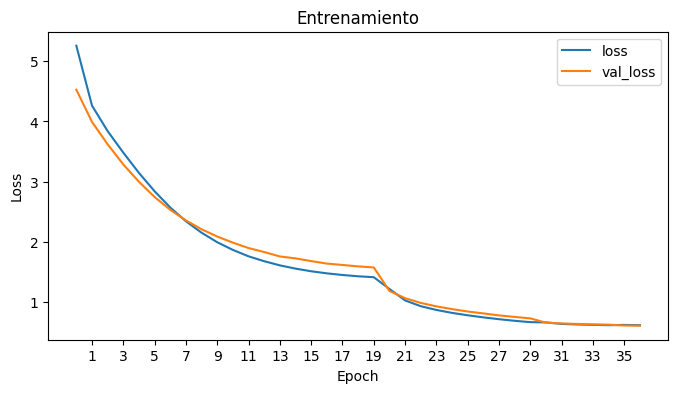

In [ ]:
metrics = history.history

plt.figure(figsize=(8,4))
plt.plot(history.epoch, metrics['loss'])
plt.plot(history.epoch, metrics['val_loss'])
plt.xticks(ticks=np.arange(1,history.epoch[-1],2))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.title('Entrenamiento')
plt.show()

* El modelo se estabilizó a partir de las 32 épocas
* No hay overfitting

### 8.8. *Generación de texto*

#### 8.8.1. **Clase para predecir**

In [ ]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    skip_ids = self.ids_from_chars('[UNK]')[:, None]
    sparse_mask = tf.SparseTensor(
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    input_ids = tf.squeeze(self.ids_from_chars(inputs), axis=-1)[None, :]

    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)

    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    predicted_logits = predicted_logits + self.prediction_mask

    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    predicted_chars = self.chars_from_ids(predicted_ids)
    return predicted_chars, states

#### 8.8.2. **Cargamos el modelo en caso de ser necesario**

Es necesario crear un modelo con la misma arquitecturas e hiperparametros que el original. El bloque de abajo es para utilizar el modelo en caso de tener los checkpoints con los pesos guardados.

In [ ]:
modelo = MyModel(
    vocab_size=tamaño_vocabulario,
    embedding_dim=dimension_embedding,
    rnn_units=unidades_rnn)

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

modelo.compile(optimizer='adam', loss=loss)

checkpoint_name = "mejor_modelo_1"

# Cargamos los pesos en el modelo
modelo.load_weights(checkpoint_name)

#### 8.8.3. **Predecimos**

In [ ]:
one_step_model = OneStep(model, des_vectorizacion, vectorizacion)

start = time.time()
states = None
next_word = 'amd'
result = [next_word]

for n in range(120):
  next_word, states = one_step_model.generate_one_step([next_word], states=states)
  result.append(next_word.numpy())

# Decodificamos a utf-8
result = [word.decode('utf-8') if isinstance(word, bytes) else word for word in result]

# Separamos en oraciones según '[nueva_linea]'
oraciones = []
oracion_actual = []

for palabra in result:
    if palabra == '[nueva_linea]':
        if oracion_actual:
            oraciones.append(' '.join(oracion_actual))
            oracion_actual = []
    else:
        oracion_actual.append(palabra)

# Mostramos las oraciones resultantes
print('---'*50+'\n')
c=1
for oracion in oraciones:
    print(f'Noticia {c}: {oracion}\n')
    c+=1
print('---'*50)
end = time.time()

print('\nRun time:', end - start, '\n')
print('---'*50)

------------------------------------------------------------------------------------------------------------------------------------------------------

Noticia 1: amd has just over three million drives in the u.s. , including the second three in four months , the best growth of trying .

Noticia 2: august 17 , 2004 ( computerworld ) - borland software corp. and ibm announced upgrades to its growing number of security products on the internet yesterday , as vendors try to avoid a back on plans to open the door for an acquisition .

Noticia 3: the majority of security workers took over the washington region only hours after six people have been killed , and in an israeli air strike on saturday using an area in the southern russian town of beslan , officials said tuesday .

------------------------------------------------------------------------------------------------------------------------------------------------------

Run time: 1.243323564529419 

------------------------------------

* Las oraciones tienen una estructura de oración como las demás
* Los usos de puntos y comás siguen teniendo fallas
* Las oraciones, al igual que el modelo dos, empiezan a tener sentido pero siguen siendo incoherentes

## 9. **Conclusiones**

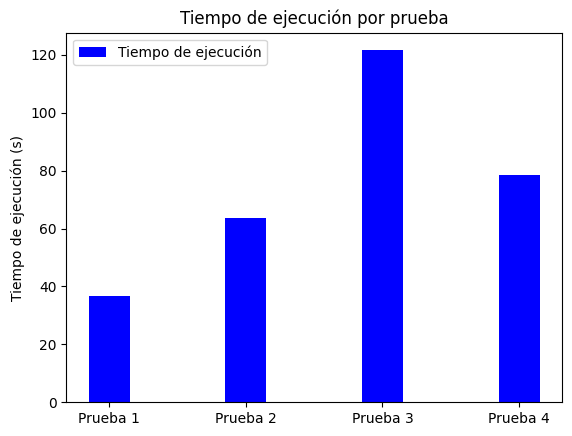

In [ ]:
# Tiempo de ejecución de cada prueba
time_test1, time_test2, time_test3, time_test4 = round(total_time_test1, 2), round(total_time_test2, 2), round(total_time_test3, 2), round(total_time_test4, 2)
tiempo = [time_test1, time_test2, time_test3, time_test4]

# Etiquetas para las pruebas
labels = ['Prueba 1', 'Prueba 2', 'Prueba 3', 'Prueba 4']

x = np.arange(len(labels))
width = 0.3

# Gráfico de barras
fig, ax = plt.subplots()

# Barras para el tiempo de ejecución
ax.bar(x, tiempo, width, label='Tiempo de ejecución', color='b')

# Etiquetas, título y leyenda
ax.set_ylabel('Tiempo de ejecución (s)')
ax.set_title('Tiempo de ejecución por prueba')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Lo que podemos ver a partir de esta comparación es que el modelo 3 fue el que mayor tiempo tardo, pero este obtuvo un rendimiento bastante pobre, un *loss* de **~1.78**. Esto no lo deja como el peor, ya que la primera prueba obtuvo **~2.3** de *loss*, lo deja como la segunda peor en cuanto a métricas y la que más tardó con diferencia.

Después tenemos el modelo 2 y el 4, tienen un tiempo de ejecución similar, aunque el 4 fue el que más tardo de estos dos y, en cuanto a métricas, también estuvieron muy cerca. El modelo 4 obtuvo un loss de **~0.61** y el modelo 2 un loss de **~0.52**. Esto deja al modelo 2 como el que mejor métricas tuvo y, además, como unos de los modelos que menor tardo en entrenar.

Esto nos muestra que, por lógica, el *Modelo 2: Una sola capa GRU con 2048 celdas* fue el modelo que mejor rendimiento/tiempo tuvo, ya que fue el segundo que menos tardo y el que tuvo las mejores métricas dejandonos como única elección para este problema este mismo modelo. También aclarar que las métricas que sacó el modelo 2 fueron inclusive mejores que las métricas de los modelos entrenados *caracter a caracterer*.